# Battle of the Neighborhoods: Choosing a neighborhood for an expatriate to live in London

London is a global city and one of the world’s largest financial centers. London also has a diverse group of inhabitants and cultures, which makes it an attractive destination for expatriates.

However, deciding on accommodation is difficult and one of the most stressful aspects of relocating. This project thus aims to guide expatriates on where they can start looking for a suitable accommodation.

**Import relevant libraries**

In [31]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

!conda install -c conda-forge folium=0.5.0 --yes 
import folium 

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


### 1. Importing and Exploring Datasets

**Import London neighborhood data. This includes geographical coordinates, crime rates, house prices and transport accessibility.**

In [32]:
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# credentials hidden for sharing

if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

london_data = pd.read_excel(body)
london_data

,Neighborhood,Latitude,Longitude,Crime rates per thousand population,Median House Price,Average Public Transport Accessibility score
0,City of London,51.5155,-0.0922,85.460000,799999,7.862302
1,Barking and Dagenham,51.5607,0.1557,83.359060,243500,2.970626
2,Barnet,51.6252,-0.1517,62.738426,445000,2.996701
3,Bexley,51.4549,0.1505,51.827942,275000,2.552134
4,Brent,51.5588,-0.2817,78.801881,407250,3.653713
5,Bromley,51.4039,0.0198,64.133577,374975,2.779859
6,Camden,51.5290,-0.1255,123.498709,700000,5.690269
7,Croydon,51.3714,-0.0977,77.035133,300000,3.224080
8,Ealing,51.5130,-0.3089,75.475775,430000,3.302496
9,Enfield,51.6538,-0.0799,69.373900,320000,2.971488


**Find the coordinates of London and plot the neighborhoods onto the map.**

In [33]:
address = 'London'

geolocator = Nominatim(user_agent="london_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [34]:
map_london = folium.Map(location=[latitude, longitude], zoom_start=10)
neighborhood = folium.map.FeatureGroup()

for lat, lng, in zip(london_data.Latitude, london_data.Longitude):
    neighborhood.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, 
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

latitudes = list(london_data.Latitude)
longitudes = list(london_data.Longitude)
labels = list(london_data.Neighborhood)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(map_london)
    
map_london.add_child(neighborhood)

### 2. Exploring each neighborhood

**Define Foursquare credentials.**

In [35]:
# credentials hidden for sharing

**Explore the venues within 1000m of each neighborhood.**

In [36]:
LIMIT = 500

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [37]:
london_venues = getNearbyVenues(names=london_data['Neighborhood'],
                                   latitudes=london_data['Latitude'],
                                   longitudes=london_data['Longitude']
                                  )

london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

london_onehot['Neighborhood'] = london_venues['Neighborhood'] 

fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head()

,Neighborhood,Afghan Restaurant,African Restaurant,Airport,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Canal,Caribbean Restaurant,Castle,Chaat Place,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Doner Restaurant,Donut Shop,Dumpling Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Film Studio,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Library,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nature Preserve,New American Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Outlet Mall,Outlet Store,Palace,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pier,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Restaurant,River,Road,Rock Club,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Smoothie Shop,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Tree,Tunnel,Turkish Restaurant,Udon Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,City of London,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [38]:
london_grouped = london_onehot.groupby('Neighborhood').mean().reset_index()
london_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,Airport,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Canal,Caribbean Restaurant,Castle,Chaat Place,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Doner Restaurant,Donut Shop,Dumpling Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Film Studio,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Library,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nature Preserve,New American Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Outlet Mall,Outlet Store,Palace,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pier,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Restaurant,River,Road,Rock Club,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Smoothie Shop,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Tree,Tunnel,Turkish Restaurant,Udon Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Windmill,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.066667,0.133333,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.

**List the top 10 most common venues in each neighborhood.**

In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [40]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = london_grouped['Neighborhood']

for ind in np.arange(london_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Bus Stop,Pool,Gym / Fitness Center,Gas Station,Soccer Field,Golf Course,Supermarket,Turkish Restaurant,Diner,Grocery Store
1,Barnet,Park,Pub,Bus Stop,Gym,Café,Fast Food Restaurant,Falafel Restaurant,Farm,Farmers Market,Yoga Studio
2,Bexley,Pub,Clothing Store,Fast Food Restaurant,Supermarket,Coffee Shop,Hotel,American Restaurant,Pharmacy,Italian Restaurant,Chinese Restaurant
3,Brent,Hotel,Coffee Shop,Bar,Sporting Goods Shop,Clothing Store,Grocery Store,Sandwich Place,Indian Restaurant,Warehouse Store,Pizza Place
4,Bromley,Pub,Clothing Store,Coffee Shop,Supermarket,Indian Restaurant,Gym / Fitness Center,Café,Park,Pizza Place,Bar
5,Camden,Coffee Shop,Hotel,Pub,Café,Sandwich Place,Burger Joint,Pizza Place,Breakfast Spot,Bookstore,Plaza
6,City of London,Coffee Shop,Gym / Fitness Center,Italian Restaurant,Scenic Lookout,Hotel,Plaza,Boxing Gym,Seafood Restaurant,Steakhouse,French Restaurant
7,Croydon,Coffee Shop,Pub,Clothing Store,Hotel,Indian Restaurant,Italian Restaurant,Mediterranean Restaurant,Bookstore,Portuguese Restaurant,Sushi Restaurant
8,Ealing,Coffee Shop,Pub,Bakery,Indian Restaurant,Café,Pizza Place,Park,Thai Restaurant,Italian Restaurant,Burger Joint
9,Enfield,Pub,Coffee Shop,Café,Clothing Store,Supermarket,Department Store,Restaurant,Optical Shop,Sandwich Place,Turkish Restaurant


### 3. Cluster Neighborhoods with k-Means Clustering

**Find the optimum value of k using sihouette score.**

In [41]:
indices = []
scores = []

london_grouped_clustering = london_grouped.drop('Neighborhood', 1)

for k in range(2, 10):
    
    kmeans = KMeans(n_clusters = k).fit(london_grouped_clustering)
    label = kmeans.labels_
    score = silhouette_score(london_grouped_clustering, label, metric='euclidean')
    
    indices.append(k)
    scores.append(score)

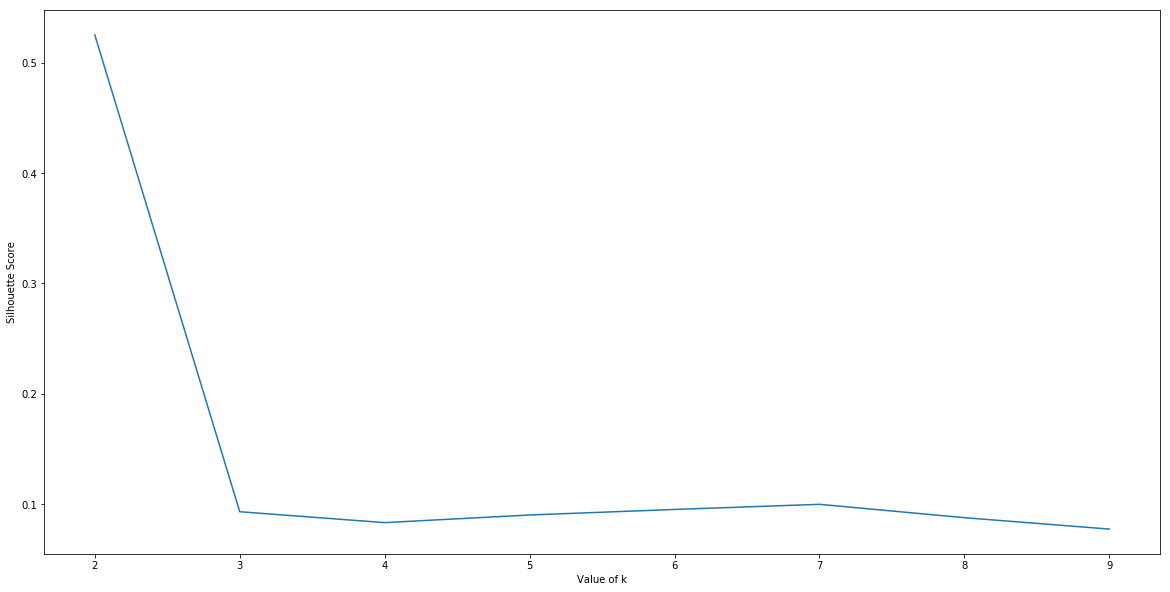

In [42]:
plt.figure(figsize=(20,10))
plt.plot(indices, scores)
plt.xlabel('Value of k')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(2, 10))
plt.show()

**We can see from the graph above that the optimum value of k=2 as it has the highest silhouette score. We will thus use k-means clustering to split the neighborhoods into 2 groups.**

In [43]:
kclusters = 2

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

london_merged = london_data

london_merged = london_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

london_merged

,Neighborhood,Latitude,Longitude,Crime rates per thousand population,Median House Price,Average Public Transport Accessibility score,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,City of London,51.5155,-0.0922,85.460000,799999,7.862302,1,Coffee Shop,Gym / Fitness Center,Italian Restaurant,Scenic Lookout,Hotel,Plaza,Boxing Gym,Seafood Restaurant,Steakhouse,French Restaurant
1,Barking and Dagenham,51.5607,0.1557,83.359060,243500,2.970626,1,Bus Stop,Pool,Gym / Fitness Center,Gas Station,Soccer Field,Golf Course,Supermarket,Turkish Restaurant,Diner,Grocery Store
2,Barnet,51.6252,-0.1517,62.738426,445000,2.996701,0,Park,Pub,Bus Stop,Gym,Café,Fast Food Restaurant,Falafel Restaurant,Farm,Farmers Market,Yoga Studio
3,Bexley,51.4549,0.1505,51.827942,275000,2.552134,1,Pub,Clothing Store,Fast Food Restaurant,Supermarket,Coffee Shop,Hotel,American Restaurant,Pharmacy,Italian Restaurant,Chinese Restaurant
4,Brent,51.5588,-0.2817,78.801881,407250,3.653713,1,Hotel,Coffee Shop,Bar,Sporting Goods Shop,Clothing Store,Grocery Store,Sandwich Place,Indian Restaurant,Warehouse Store,Pizza Place
5,Bromley,51.4039,0.0198,64.133577,374975,2.779859,1,Pub,Clothing Store,Coffee Shop,Supermarket,Indian Restaurant,Gym / Fitness Center,Café,Park,Pizza Place,Bar
6,Camden,51.5290,-0.1255,123.498709,700000,5.690269,1,Coffee Shop,Hotel,Pub,Café,Sandwich Place,Burger Joint,Pizza Place,Breakfast Spot,Bookstore,Plaza
7,Croydon,51.3714,-0.0977,77.035133,300000,3.224080,1,Coffee Shop,Pub,Clothing Store,Hotel,Indian Restaurant,Italian Restaurant,Mediterranean Restaurant,Bookstore,Portuguese Restaurant,Sushi Restaurant
8,Ealing,51.5130,-0.3089,75.475775,430000,3.302496,1,Coffee Shop,Pub,Bakery,Indian Restaurant,Café,Pizza Place,Park,Thai Restaurant,Italian Restaurant,Burger Joint
9,Enfield,51.6538,-0.0799,69.373900,320000,2.971488,1,Pub,Coffee Shop,Café,Clothing Store,Supermarket,Department Store,Restaurant,Optical Shop,Sandwich Place,Turkish Restaurant


**Visualize the 2 clusters on the map.**

In [44]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['Neighborhood'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

**We realise that one cluster has only one neighborhood.**

### 4. Analyzing each cluster to solve the problem

**Looking at the top 10 venues of each cluster.**

In [45]:
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0,3,4,5] + list(range(7, london_merged.shape[1]))]]

,Neighborhood,Crime rates per thousand population,Median House Price,Average Public Transport Accessibility score,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Barnet,62.738426,445000,2.996701,Park,Pub,Bus Stop,Gym,Café,Fast Food Restaurant,Falafel Restaurant,Farm,Farmers Market,Yoga Studio


In [46]:
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0,3,4,5] + list(range(7, london_merged.shape[1]))]]

,Neighborhood,Crime rates per thousand population,Median House Price,Average Public Transport Accessibility score,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,City of London,85.460000,799999,7.862302,Coffee Shop,Gym / Fitness Center,Italian Restaurant,Scenic Lookout,Hotel,Plaza,Boxing Gym,Seafood Restaurant,Steakhouse,French Restaurant
1,Barking and Dagenham,83.359060,243500,2.970626,Bus Stop,Pool,Gym / Fitness Center,Gas Station,Soccer Field,Golf Course,Supermarket,Turkish Restaurant,Diner,Grocery Store
3,Bexley,51.827942,275000,2.552134,Pub,Clothing Store,Fast Food Restaurant,Supermarket,Coffee Shop,Hotel,American Restaurant,Pharmacy,Italian Restaurant,Chinese Restaurant
4,Brent,78.801881,407250,3.653713,Hotel,Coffee Shop,Bar,Sporting Goods Shop,Clothing Store,Grocery Store,Sandwich Place,Indian Restaurant,Warehouse Store,Pizza Place
5,Bromley,64.133577,374975,2.779859,Pub,Clothing Store,Coffee Shop,Supermarket,Indian Restaurant,Gym / Fitness Center,Café,Park,Pizza Place,Bar
6,Camden,123.498709,700000,5.690269,Coffee Shop,Hotel,Pub,Café,Sandwich Place,Burger Joint,Pizza Place,Breakfast Spot,Bookstore,Plaza
7,Croydon,77.035133,300000,3.224080,Coffee Shop,Pub,Clothing Store,Hotel,Indian Restaurant,Italian Restaurant,Mediterranean Restaurant,Bookstore,Portuguese Restaurant,Sushi Restaurant
8,Ealing,75.475775,430000,3.302496,Coffee Shop,Pub,Bakery,Indian Restaurant,Café,Pizza Place,Park,Thai Restaurant,Italian Restaurant,Burger Joint
9,Enfield,69.373900,320000,2.971488,Pub,Coffee Shop,Café,Clothing Store,Supermarket,Department Store,Restaurant,Optical Shop,Sandwich Place,Turkish Restaurant
10,Greenwich,79.376383,340000,3.443409,Pub,Grocery Store,Supermarket,Coffee Shop,Plaza,Clothing Store,Sandwich Place,Bakery,Hotel,Pier


**Comparing the amenities available in both clusters,** 
### Barnet 
**looks like an ideal location for expatriates who prefer a quiet neighborhood. In contrast to the second cluster, the neighborhood has plenty of parks and farms.**

**But what if someone prefers a more lively neighborhood? We then look at the second cluster for options. The neighborhoods are sorted according to the crime rate, median house price and accessibility. Neighborhoods with hotels and pubs being one of the top 2 most common venues were also dropped (it might be a little too busy to stay there).**

In [47]:
ideal_cluster_lively = london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0,3,4,5] + list(range(7, london_merged.shape[1]))]]
ideal_cluster_lively.sort_values(['Crime rates per thousand population', 'Median House Price', 'Average Public Transport Accessibility score'], ascending=(True, True, False), inplace=True)
ideal_cluster_lively.drop(ideal_cluster_lively[ideal_cluster_lively['1st Most Common Venue']=='Hotel'].index, inplace=True)
ideal_cluster_lively.drop(ideal_cluster_lively[ideal_cluster_lively['1st Most Common Venue']=='Pub'].index, inplace=True)
ideal_cluster_lively.drop(ideal_cluster_lively[ideal_cluster_lively['2nd Most Common Venue']=='Hotel'].index, inplace=True)
ideal_cluster_lively.drop(ideal_cluster_lively[ideal_cluster_lively['2nd Most Common Venue']=='Pub'].index, inplace=True)
ideal_cluster_lively

,Neighborhood,Crime rates per thousand population,Median House Price,Average Public Transport Accessibility score,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Harrow,50.396101,396150,2.870196,Coffee Shop,Indian Restaurant,Sandwich Place,Clothing Store,Gym / Fitness Center,Fast Food Restaurant,Pharmacy,Park,Afghan Restaurant,Thai Restaurant
28,Sutton,55.856141,320000,2.854086,Clothing Store,Coffee Shop,Pub,Pizza Place,Café,Sandwich Place,Supermarket,Bar,Bakery,Italian Restaurant
20,Kingston upon Thames,58.455691,410000,2.928251,Coffee Shop,Café,Pub,Clothing Store,Italian Restaurant,Burger Joint,Thai Restaurant,Park,Department Store,Bookstore
23,Merton,59.747174,415000,3.405588,Supermarket,Café,Tram Station,Train Station,Park,Italian Restaurant,Fast Food Restaurant,Pizza Place,Bookstore,Sandwich Place
25,Redbridge,69.687656,345000,2.982147,Grocery Store,Clothing Store,Fast Food Restaurant,Supermarket,Coffee Shop,Bakery,Pub,Sandwich Place,Gym / Fitness Center,Bookstore
16,Hillingdon,76.619736,350000,2.363094,Coffee Shop,Clothing Store,Pub,Italian Restaurant,Fast Food Restaurant,Pharmacy,Sandwich Place,Gym,Bookstore,Bar
22,Lewisham,76.979523,352000,4.089887,Supermarket,Grocery Store,Coffee Shop,Park,Platform,Pub,Italian Restaurant,Café,Shopping Mall,Fast Food Restaurant
17,Hounslow,79.155663,355000,3.030523,Coffee Shop,Grocery Store,Indian Restaurant,Clothing Store,Fast Food Restaurant,Hotel,Bus Stop,Supermarket,Discount Store,Pub
1,Barking and Dagenham,83.359060,243500,2.970626,Bus Stop,Pool,Gym / Fitness Center,Gas Station,Soccer Field,Golf Course,Supermarket,Turkish Restaurant,Diner,Grocery Store
0,City of London,85.460000,799999,7.862302,Coffee Shop,Gym / Fitness Center,Italian Restaurant,Scenic Lookout,Hotel,Plaza,Boxing Gym,Seafood Restaurant,Steakhouse,French Restaurant


**So for those who prefer a more lively place to stay,** 
### Harrow and Sutton 
**are good choices as well.**